In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [11]:
msg = pd.read_csv("data/msg.csv")
ses_1_42 = pd.read_csv("data/ses_1_42.csv")
ses_full = pd.read_csv("data/ses_full.csv")

In [9]:
'''#subsetting some invalid sessions without msg data
ses_full = ses_full[-ses_full.question_student_count.isnull()]
# lower case text
ses_full['text'] = ses_full.text.str.lower()

#suggested growth mindset phrases
gm_phrase = ['hard work', 'working hard',"you're so close", 'you are so close', 'nice effort', 'good job', \
             "you've got this", "you got this", "keep at it", "keep going", "keep trying", "almost there", "yet"]

#individually inputting phrases
for i, phrase in enumerate(gm_phrase):
    _ls_any = [1 if t.count(phrase)> 0 else 0 for t in msg.text_lower.astype(str)]
    msg['gp_' + str(i)] = _ls_any
    

ses_full = ses_full.merge(pd.DataFrame(msg[(msg.sent_from == 'tutor')].groupby('session_id')[msg.columns[-13:]].sum()).reset_index(), how = 'left', on = 'session_id')


#summing across rows and than a boolean for gp preasent
ses_full['gp_sum'] = ses_full[ses_full.columns[-13:]].sum(axis = 1)
ses_full.loc[ ses_full.gp_sum > 0 , 'gp_bool']  =  1
ses_full.loc[ ses_full.gp_sum == 0 , 'gp_bool']  =  0'''

In [7]:
ses_full[ses_full.session_count >4].groupby('student_id')['gb_bool'].mean().shape#.hist()#gp_bool.hist()

(1484,)

In [16]:
ses_full[ses_full.columns[-16:]].sum().sort_values()

gp_8           6.000000
gp_1          13.000000
gp_10         18.000000
gp_4          27.000000
gp_rate       32.032465
gp_0          53.000000
gp_3          58.000000
gp_6          59.000000
gp_7         292.000000
gp_2         390.000000
gp_9         669.000000
gp_11       2690.000000
gp_12       3066.000000
gp_5        9345.000000
gp_bool     9598.000000
gp_sum     16686.000000
dtype: float64

In [17]:
ses.info()[:40]

gp_bool,0.0,1.0
gp_0,0.0,0.005522
gp_1,0.0,0.001354
gp_2,0.0,0.040633
gp_3,0.0,0.006043
gp_4,0.0,0.002813
gp_5,0.0,0.973640
gp_6,0.0,0.006147
gp_7,0.0,0.030423
gp_8,0.0,0.000625
gp_9,0.0,0.069702


In [20]:
ses_full.groupby('gp_bool')['session_id'].count()

gp_bool
0.0    24120
1.0     9598
Name: session_id, dtype: int64

In [30]:
ses_full[ses_full.gp_sum>=3]['gb_bool'].mean()

0.915053091817614

In [34]:
ses_full['gp_rate'] =  ses_full['gp_sum'] / ses_full['word_count'] 

In [42]:
ses_full.to_csv('data/ses_full.csv')

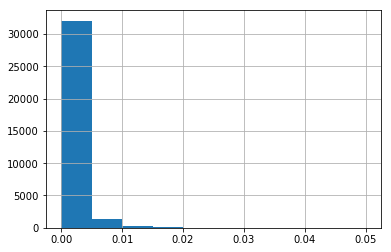

In [36]:
ses_full['gp_rate'].hist()

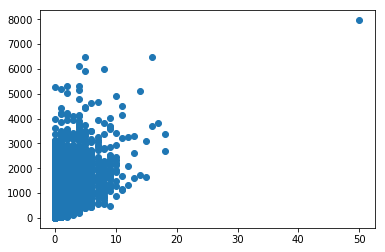

In [41]:
plt.scatter(ses_full['gp_sum'], ses_full['word_count'])

In [76]:
ses_full = pd.read_csv("data/ses_full.csv")

In [77]:
s_meta = pd.read_csv("data/student_user_table.csv")
s_meta = s_meta[['User Id', 'First Name']]
s_meta.columns = ['student_id' , 'first_name']
ses_full = ses_full.merge(s_meta, how = 'left', on = 'student_id')
ses_full_student = ses_full[-pd.isnull(ses_full.first_name)]

ses_full_student['first_name'] = ses_full_student.first_name.str.lower()
names = ses_full_student.first_name.values
text = ses_full_student.text.values
name_count = []
for tup in zip(names, text):
    name_count.append(tup[1].count(tup[0]))

ses_full_student['name_count'] = name_count
ses_full_student['name_rate'] = ses_full_student.name_count / ses_full_student.word_count

min_ses_df = pd.DataFrame(msg.groupby('session_id')['created_at_clean'].min()).reset_index()
max_ses_df = pd.DataFrame(msg.groupby('session_id')['created_at_clean'].max()).reset_index()
df_diff = min_ses_df.merge(max_ses_df, how = 'left', on = 'session_id')
df_diff['ses_time_delta'] = (df_diff['created_at_clean_y'] - df_diff['created_at_clean_x']).astype('timedelta64[m]')
ses_full = ses_full.merge(df_diff, how = 'left', on = "session_id")



In [110]:
ses_full_student.to_csv("data/ses_full_student.csv")

In [111]:
students = pd.read_csv('data/students.csv')

In [64]:
msg['created_at_clean'] = pd.Timestamp(msg.created_at_clean)

TypeError: Cannot convert input [0         2016-06-08 00:05:00
1         2016-06-08 00:05:00
2         2016-06-08 00:05:00
3         2016-06-08 00:05:00
4         2016-06-08 00:05:00
5         2016-06-08 00:05:00
6         2016-06-08 00:05:00
7         2016-06-08 00:05:00
8         2016-06-08 00:05:00
9         2016-06-08 00:05:00
10        2016-06-08 01:00:00
11        2016-06-08 01:00:00
12        2016-06-08 01:00:00
13        2016-06-08 01:00:00
14        2016-06-08 01:00:00
15        2016-06-08 01:00:00
16        2016-06-08 01:00:00
17        2016-06-08 01:00:00
18        2016-06-08 01:00:00
19        2016-06-08 01:00:00
20        2016-06-08 01:00:00
21        2016-06-08 01:00:00
22        2016-06-08 01:00:00
23        2016-06-08 01:00:00
24        2016-06-08 01:00:00
25        2016-06-08 01:00:00
26        2016-06-08 01:00:00
27        2016-06-08 01:00:00
28        2016-06-08 01:00:00
29        2016-06-08 01:00:00
                  ...        
2550648   2017-06-28 23:05:00
2550649   2017-06-28 23:05:00
2550650   2017-06-28 23:05:00
2550651   2017-06-28 23:05:00
2550652   2017-06-28 23:05:00
2550653   2017-06-28 23:05:00
2550654   2017-06-28 23:05:00
2550655   2017-06-28 23:05:00
2550656   2017-06-28 23:05:00
2550657   2017-06-28 23:05:00
2550658   2017-06-28 23:05:00
2550659   2017-06-28 23:05:00
2550660   2017-06-28 23:05:00
2550661   2017-06-28 23:05:00
2550662   2017-06-28 23:05:00
2550663   2017-06-28 23:05:00
2550664   2017-06-28 23:05:00
2550665   2017-06-28 23:05:00
2550666   2017-06-28 23:05:00
2550667   2017-06-28 23:05:00
2550668   2017-06-28 23:05:00
2550669   2017-06-28 23:05:00
2550670   2017-06-28 23:05:00
2550671   2017-06-28 23:05:00
2550672   2017-06-28 23:05:00
2550673   2017-06-28 23:05:00
2550674   2017-06-28 23:05:00
2550675   2017-06-28 23:05:00
2550676   2017-06-28 23:05:00
2550677   2017-06-28 23:05:00
Name: created_at_clean, dtype: datetime64[ns]] of type <class 'pandas.core.series.Series'> to Timestamp

In [56]:
#students['gb_rate'] = 1.0*students.gb_count / students.session_count
#students['time_to_gb'] = students.first_gb - students.first_session
#students['days_to_gb'] = students.time_to_gb.astype('timedelta64[D]')
df_diff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42772 entries, 0 to 42771
Data columns (total 4 columns):
session_id            42772 non-null int64
created_at_clean_x    42772 non-null datetime64[ns]
created_at_clean_y    42772 non-null datetime64[ns]
delta_msg             42772 non-null timedelta64[ns]
dtypes: datetime64[ns](2), int64(1), timedelta64[ns](1)
memory usage: 1.6 MB


In [94]:
min_ses_df = pd.DataFrame(msg.groupby('session_id')['created_at_clean'].min()).reset_index()
max_ses_df = pd.DataFrame(msg.groupby('session_id')['created_at_clean'].max()).reset_index()
df_diff = min_ses_df.merge(max_ses_df, how = 'left', on = 'session_id')
df_diff['ses_time_delta'] = (df_diff['created_at_clean_y'] - df_diff['created_at_clean_x']).astype('timedelta64[m]')
ses_full = ses_full.merge(df_diff, how = 'left', on = "session_id")

In [85]:
df_diff['ses_time_delta'] = (df_diff['created_at_clean_y'] - df_diff['created_at_clean_x']).astype('timedelta64[m]')
ses_full = ses_full.merge(df_diff, how = 'left', on = "session_id")

In [95]:
min_ses_df.dtypes

session_id                   int64
created_at_clean    datetime64[ns]
dtype: object

In [93]:
ses_full

,Unnamed: 0,Unnamed: 0.1,session_id,tutor_id,student_id,timestamp,feedback_score,wait_time,ended_by_reason,session_category,...,gp_9,gp_10,gp_11,gp_12,gp_sum,gp_bool,gp_rate,created_at_clean_x,created_at_clean_y,ses_time_delta
0,0,0,299889,18172.0,381768,2016-06-08 00:55:15 UTC,0.400000,45.310611,student:end_button,gap-explanation,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2016-06-08 00:05:00,2016-06-08 01:00:00,55.0
1,1,1,299890,283248.0,375024,2016-06-08 01:06:08 UTC,0.900000,3.697823,student:terminated_app,gap-bridged,...,0.0,0.0,0.0,0.0,1.0,1.0,0.001642,2016-06-08 01:00:00,2016-06-08 01:04:00,4.0
2,2,2,299891,8593.0,343165,2016-06-08 01:52:46 UTC,0.000000,10.116270,student:end_button,gap-clarification,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2016-06-08 01:05:00,2016-06-08 01:05:00,0.0
3,3,3,299892,283248.0,375024,2016-06-08 01:54:33 UTC,0.900000,3.172246,tutor:end_button,gap-bridged,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2016-06-08 01:05:00,2016-06-08 02:01:00,56.0
4,4,4,299893,43182.0,154731,2016-06-08 01:55:00 UTC,0.800000,7.960689,student:end_button,gap-explanation,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2016-06-08 01:05:00,2016-06-08 02:00:00,55.0
5,5,5,299894,94301.0,382124,2016-06-08 02:09:05 UTC,1.000000,4.961054,student:end_button,gap-bridged,...,0.0,0.0,0.0,0.0,2.0,1.0,0.001015,2016-06-08 02:00:00,2016-06-08 03:00:00,60.0
6,6,6,299896,181.0,362388,2016-06-08 03:42:28 UTC,0.900000,5.874542,student:end_button,gap-bridged,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2016-06-08 03:04:00,2016-06-08 03:05:00,1.0
7,7,7,299897,53951.0,219836,2016-06-08 04:05:49 UTC,1.000000,9.681197,student:end_button,gap-bridged,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2016-06-08 04:00:00,2016-06-08 04:05:00,5.0
8,8,8,299898,40790.0,98716,2016-06-08 04:40:11 UTC,0.000000,27.371504,student:end_button,gap-clarification,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2016-06-08 04:04:00,2016-06-08 04:04:00,0.0
9,9,9,299899,18.0,219836,2016-06-08 05:03:01 UTC,0.900000,6.841825,student:end_button,gap-bridged,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2016-06-08 05:00:00,2016-06-08 05:04:00,4.0
